# LinearRegression

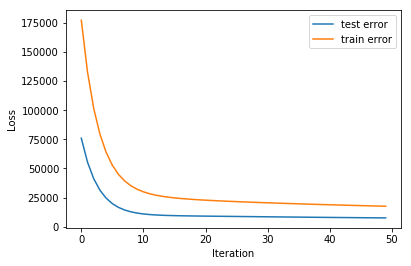

In [3]:
#!/usr/bin/python
# -*- coding: utf-8 -*-
"""
-------------------------------------------------
   File Name：     LabTest
   Description :
   Author :       Nathan
   date：          2017/12/1
-------------------------------------------------
   Change Activity:
                   2017/12/1:
-------------------------------------------------
"""
from random import random

__author__ = 'Nathan'

from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

def compute_error(W,X_test,y_test):
    # L=0
    # for i in range(y_test.shape[0]):
    #     L+=0.5*((y_test[i]-np.dot(W.transpose(),X_test[i]))**2)
    # return L
    loss=np.matmul(y_test.T,y_test)-2*np.matmul(np.matmul(W.T,X_test.T),y_test)+np.matmul(np.matmul(np.matmul(W.T,X_test.T),X_test),W)
    return np.linalg.det(loss)


def compute_gradient(W,X_train,Y_train):
    L=np.dot(-X_train.transpose(),Y_train)+np.dot(np.dot(X_train.transpose(),X_train),W)
    return L

def optimizer(X_train,y_trian,W_start,learning_rate):
    W=W_start
    W=W-learning_rate*compute_gradient(W,X_train,y_trian)
    return W

def shuffle(X,y):
    rng_state = np.random.get_state()
    np.random.shuffle(X)
    np.random.set_state(rng_state)
    np.random.shuffle(y)
    return X,y

def getdata():
    X, y = load_svmlight_file(r'C:\Users\jy\Desktop\Libsvmdata\housing_scale.txt')
    X = np.c_[np.ones(len(X.toarray())), X.toarray()]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    y_train = y_train.reshape([len(y_train), 1])
    y_test = y_test.reshape([len(y_test), 1])
    X_train, y_train = shuffle(X_train, y_train)
    X_test,y_test=shuffle(X_test,y_test)
    return X_train, X_test, y_train, y_test

def linearmodel():
    X_train, X_test, y_train, y_test = getdata()
    W = np.random.rand(14,1)
    learning_rate = 0.0001
    iter_num=50
    test_error=[]
    train_error=[]
    for i in range(iter_num):
        W=optimizer(X_train,y_train,W,learning_rate)
        test_error.append(compute_error(W,X_test,y_test))
        train_error.append(compute_error(W,X_train,y_train))

    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.plot(range(iter_num),test_error,label="test error")
    plt.plot(range(iter_num), train_error, label="train error")
    plt.legend()
    plt.show()

linearmodel()
